# Chapter 1: GemPy Basic

In this first example, we will show how to construct a first basic model and the main objects and functions. First we import gempy:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np
np.set_printoptions(linewidth=200)

# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 50,50,50],
                         path_f = os.pardir+"/input_data/FabLessPoints_Foliations.csv",
                         path_i = os.pardir+"/input_data/FabLessPoints_Points.csv")

# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest": ('SecondaryReservoir','Seal', 'Reservoir', 'Overlying'), 
                               },
                       order_series = ["fault", 'Rest'],
                       order_formations=['MainFault', 
                                         'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
                                         ]) 
geo_data = gp.select_series(geo_data, ['Rest'])

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
../../gempy/data_management.py:68: UserWarning: path_f is deprecated use instead path_o
  warnings.warn('path_f is deprecated use instead path_o')


In [2]:
import theano.tensor as T
import theano
interp_data = gp.InterpolatorData(geo_data,u_grade=[1],
                                  output='gradients', dtype='float64', compile_theano=True,
                                 verbose=[])

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0


In [3]:
lith_block, fault_block =gp.compute_model(interp_data)

../../gempy/gempy_front.py:867: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


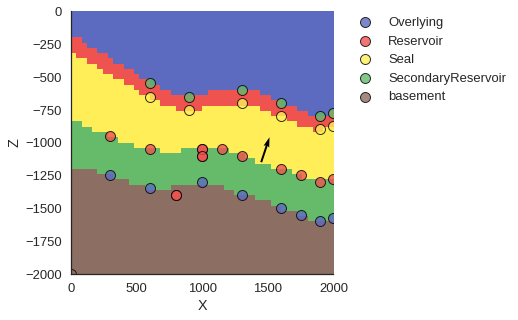

In [4]:
%matplotlib inline
gp.plot_section(geo_data, lith_block[0], cell_number=25,  direction='y', plot_data=True)

In [5]:
r = 1
V, s = np.gradient(lith_block[1].reshape(50,50,50)[::r,25,::r].T )

../../gempy/gempy_front.py:889: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


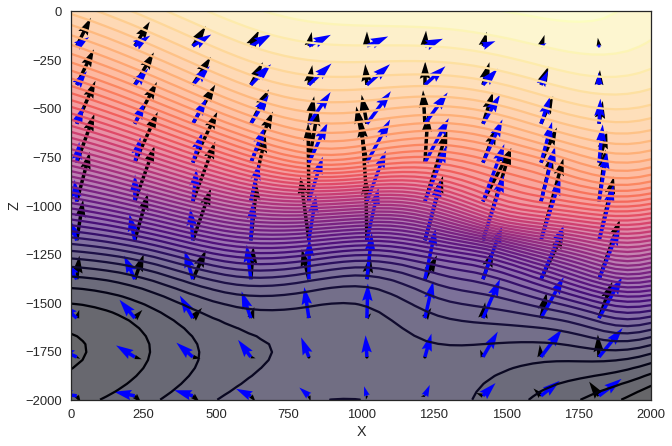

In [6]:
import matplotlib.pyplot as plt
gp.plot_scalar_field(geo_data, lith_block[1], cell_number=25, N=60, 
                        direction='y', plot_data=False)

r = 5
s2= lith_block[2].reshape(50,50,50)[::r,25,::r].T 
V2 = lith_block[4].reshape(50,50,50)[::r,25,::r].T 
plt.quiver(geo_data.grid.values[:,0].reshape(50,50,50)[::r,25,::r].T,
           geo_data.grid.values[:,2].reshape(50,50,50)[::r,25,::r].T, 
           s[::r,::r], 
           V[::r,::r], pivot="tail")


plt.quiver(geo_data.grid.values[:,0].reshape(50,50,50)[::r,25,::r].T,
           geo_data.grid.values[:,2].reshape(50,50,50)[::r,25,::r].T, s2, V2, pivot="tail",
          color= 'blue')


In [10]:
import theano.tensor as T
import theano
interp_data2 = gp.InterpolatorData(geo_data,u_grade=[1],
                                  output='gradients', dtype='float64', compile_theano=False,
                                 verbose=[])

In [13]:
th1 = theano.function(interp_data2.interpolator.tg.input_parameters_list(),
                      interp_data2.interpolator.tg.contribution_gradient())

th2 = theano.function(interp_data2.interpolator.tg.input_parameters_list(),
                      interp_data2.interpolator.tg.contribution_interface_gradient())
th3 = theano.function(interp_data2.interpolator.tg.input_parameters_list(),
                      interp_data2.interpolator.tg.contribution_universal_drift_d())

/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
  


In [14]:
i = interp_data.get_input_data()
a = th1(*i)
b = th2(*i)
c = th3(*i)

In [19]:
a[:125000].reshape(50,50,50)[::r,25,::r].T + b[:125000].reshape(50,50,50)[::r,25,::r].T + c[:125000].reshape(50,50,50)[::r,25,::r].T 

array([[-3.32226416, -3.18695352, -2.83934648, -2.26304504, -1.45738036, -0.43510972,  0.74958759,  1.93567747,  2.88380714,  3.45027359],
       [-3.02165416, -2.8690252 , -2.52050071, -1.95689595, -1.18668965, -0.20485929,  1.00372108,  2.27353323,  3.21077684,  3.61712383],
       [-2.52976694, -2.346176  , -1.98807912, -1.42282768, -0.70308877,  0.14774593,  1.2805559 ,  2.62071694,  3.4901373 ,  3.54757036],
       [-1.87508458, -1.63552298, -1.25180575, -0.63846389,  0.08069068,  0.76657616,  1.65704783,  2.95576578,  3.52614716,  3.14000514],
       [-1.12705376, -0.80535737, -0.35507062,  0.32423713,  1.10722815,  1.79459923,  2.43934308,  3.23737161,  3.00187152,  2.24963544],
       [-0.35674427,  0.05086444,  0.59532841,  1.29876564,  2.1273386 ,  2.9051201 ,  3.36018238,  3.28367727,  2.16173485,  1.24564973],
       [ 0.38830783,  0.87037081,  1.4596215 ,  2.1277034 ,  2.87068957,  3.56853368,  3.66258271,  2.99827295,  1.70588874,  0.57070986],
       [ 1.04389222,  1.562

In [16]:
a[:125000].reshape(50,50,50)[::r,25,::r].T 

array([[-2.12082771, -2.01605495, -1.78266131, -1.40947598, -0.88759916, -0.21999301,  0.55448065,  1.33208078,  1.96048091,  2.32640588],
       [-1.92480539, -1.8026889 , -1.56639027, -1.20577967, -0.70646807, -0.05272089,  0.74498153,  1.57637308,  2.20951864,  2.48164518],
       [-1.60171645, -1.45117866, -1.20392844, -0.85617491, -0.39807001,  0.1951021 ,  0.96078308,  1.83260959,  2.42978731,  2.5094964 ],
       [-1.16492493, -0.97008974, -0.69298516, -0.33758626,  0.09290518,  0.604049  ,  1.24081742,  2.09622136,  2.54133431,  2.27569325],
       [-0.64775327, -0.39579153, -0.0700378 ,  0.32211973,  0.77101455,  1.26519378,  1.79232249,  2.36981626,  2.1869177 ,  1.65167524],
       [-0.10078004,  0.20849965,  0.58378927,  1.01539352,  1.48959366,  1.98338355,  2.42797236,  2.40701708,  1.57334754,  0.9389579 ],
       [ 0.41887437,  0.7695281 ,  1.17058378,  1.60348219,  2.03575803,  2.39954511,  2.53181689,  2.14244549,  1.29266946,  0.49643861],
       [ 0.86156826,  1.227

In [18]:
b[:125000].reshape(50,50,50)[::r,25,::r].T 

array([[-1.14507565, -1.11453777, -1.00032436, -0.79720825, -0.51342039, -0.1587559 ,  0.25146775,  0.6599575 ,  0.97968704,  1.18022852],
       [-1.04048796, -1.00997549, -0.89774964, -0.69475547, -0.42386077, -0.09577759,  0.31510036,  0.75352096,  1.057619  ,  1.19183945],
       [-0.87168968, -0.83863654, -0.72778987, -0.51029196, -0.24865795,  0.00900464,  0.37613362,  0.84446816,  1.1167108 ,  1.09443477],
       [-0.65379885, -0.60907244, -0.50245978, -0.24451683,  0.04414631,  0.21888797,  0.47259122,  0.91590523,  1.04117365,  0.9206727 ],
       [-0.42293969, -0.35320503, -0.22867201,  0.05847821,  0.39257441,  0.58576626,  0.70338139,  0.92391616,  0.87131463,  0.65432101],
       [-0.19960343, -0.10127441,  0.06789995,  0.33973293,  0.69410574,  0.97809735,  0.98857083,  0.93302099,  0.64474812,  0.36305264],
       [ 0.02579427,  0.15720352,  0.34539853,  0.58058202,  0.89129235,  1.22534937,  1.18712663,  0.91218827,  0.46958009,  0.13063206],
       [ 0.23868477,  0.391

In [17]:
c[:125000].reshape(50,50,50)[::r,25,::r].T 

array([[-0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081],
       [-0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081],
       [-0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081],
       [-0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081],
       [-0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081],
       [-0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081],
       [-0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081, -0.05636081],
       [-0.05636081, -0.056

../../gempy/gempy_front.py:889: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


<IPython.core.display.Javascript object>


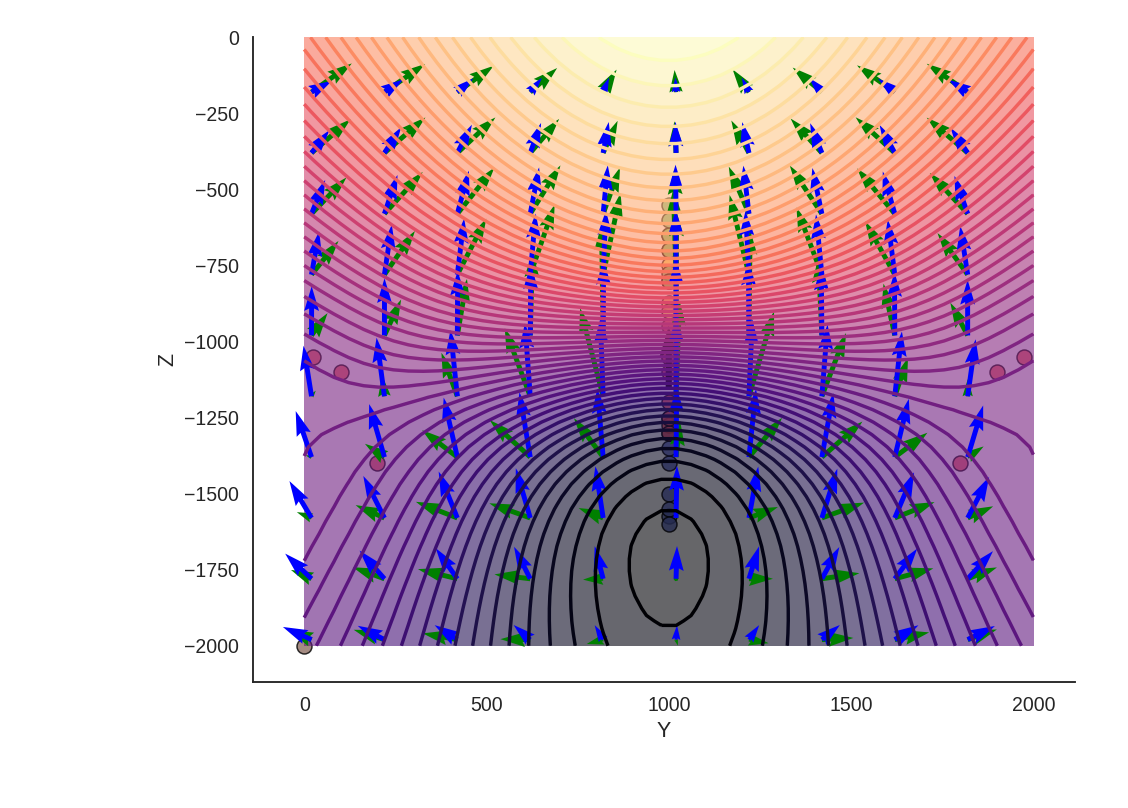

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
gp.plot_scalar_field(geo_data, lith_block[1], cell_number=25, N=60, 
                        direction='x', plot_data=True)

r = 1
V, s = np.gradient(lith_block[1].reshape(50,50,50)[25,::r,::r].T )

r = 5
s2= lith_block[3].reshape(50,50,50)[25,::r,::r].T 
V2 = lith_block[4].reshape(50,50,50)[25,::r,::r].T 
plt.quiver(geo_data.grid.values[:,1].reshape(50,50,50)[25,::r,::r].T,
           geo_data.grid.values[:,2].reshape(50,50,50)[25,::r,::r].T, 
           s[::r,::r], 
           V[::r,::r], pivot="tail", color='green')


plt.quiver(geo_data.grid.values[:,1].reshape(50,50,50)[25,::r,::r].T,
           geo_data.grid.values[:,2].reshape(50,50,50)[25,::r,::r].T, s2, V2, pivot="tail",
          color= 'blue')


../../gempy/gempy_front.py:867: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


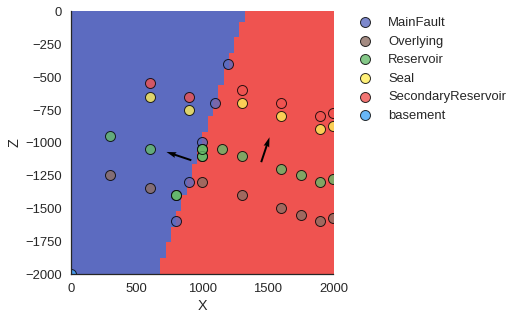

In [6]:
%matplotlib inline
gp.plot_section(geo_data, fault_block[0], cell_number=25, plot_data=True, direction='y')

../../gempy/gempy_front.py:889: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


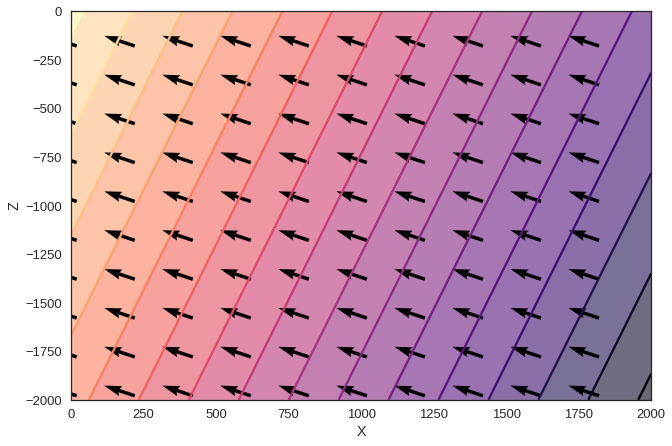

In [14]:
gp.plot_scalar_field(geo_data, fault_block[1], cell_number=25, N=15, 
                        direction='y', plot_data=False)

r = 5
s= fault_block[2].reshape(50,50,50)[::r,25,::r].T 
V = fault_block[4].reshape(50,50,50)[::r,25,::r].T 
plt.quiver(geo_data.grid.values[:,0].reshape(50,50,50)[::r,25,::r].T,
           geo_data.grid.values[:,2].reshape(50,50,50)[::r,25,::r].T, s, V, pivot="tail")


In [11]:
s

array([[-0.94868755, -0.94868731, -0.94868714, ..., -0.94867784, -0.94867802, -0.94867814],
       [-0.94868743, -0.94868726, -0.94868702, ..., -0.9486779 , -0.94867808, -0.94867826],
       [-0.94868737, -0.94868714, -0.94868696, ..., -0.94867802, -0.9486782 , -0.94867837],
       ..., 
       [-0.9486776 , -0.94867748, -0.94867742, ..., -0.94868797, -0.94868815, -0.94868833],
       [-0.9486776 , -0.94867754, -0.94867748, ..., -0.94868797, -0.94868815, -0.94868833],
       [-0.94867766, -0.9486776 , -0.94867754, ..., -0.94868797, -0.94868815, -0.94868833]])

In [12]:
V

array([[ 0.31622902,  0.3162291 ,  0.31622916, ...,  0.31623223,  0.31623217,  0.31623212],
       [ 0.31622955,  0.31622961,  0.3162297 , ...,  0.31623271,  0.31623262,  0.31623253],
       [ 0.31623006,  0.31623015,  0.31623027, ...,  0.31623313,  0.31623304,  0.31623292],
       ..., 
       [ 0.31623003,  0.31623003,  0.31623   , ...,  0.31622663,  0.3162266 ,  0.3162266 ],
       [ 0.31622961,  0.31622958,  0.31622952, ...,  0.31622621,  0.31622621,  0.31622618],
       [ 0.31622916,  0.31622913,  0.31622908, ...,  0.3162258 ,  0.3162258 ,  0.3162258 ]])

In [2]:
geo_data.interfaces.head()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,300.0,1000.0,-1250.0,Overlying,Rest,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,2000.0,1000.0,-1575.0,Overlying,Rest,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,1300.0,1000.0,-1400.0,Overlying,Rest,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
3,1600.0,1000.0,-1500.0,Overlying,Rest,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
4,1750.0,1000.0,-1550.0,Overlying,Rest,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1


In [3]:
#gp.set_orientation_from_interfaces(geo_data, [0,1,2])
geo_data.interfaces.loc[[0]]
new_point = geo_data.interfaces.loc[[0]]
# 90 deg
#new_point['Z'] = -1200
# 45 deg
new_point['X'] = 750
new_point['Z'] = -1500
geo_data.interfaces = geo_data.interfaces.loc[[0]]
geo_data.interfaces["X"] = 850
geo_data.interfaces["Z"] = -1500
geo_data.update_df()
geo_data.set_interfaces(new_point, append=True)
geo_data.update_df()

In [4]:
geo_data.interfaces

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,850.0,1000.0,-1500.0,Overlying,Rest,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,750.0,1000.0,-1500.0,Overlying,Rest,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,0.0,0.0,-2000.0,basement,Rest,2,1,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2


In [5]:
#gp.set_orientation_from_interfaces(geo_data, [0,1,2])

In [6]:
geo_data.modify_orientation(0, dip=90, Y=1000)

new_ori = geo_data.orientations.loc[[0]]
new_ori['dip'] = 270
new_ori['X'] = 150
geo_data.set_orientations(new_ori, append=True)


In [7]:
geo_data.orientations

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,1450.0,1000.0,-1150.0,1.0,1.000000e-07,1.000000e-07,90.0,90.0,1.0,Reservoir,Rest,NaN,1,False,"${\bf{x}}_{\beta \,{\bf{nan}},0}$",NaN
1,150.0,1000.0,-1150.0,-1.0,1.000000e-07,1.000000e-07,270.0,90.0,1.0,Reservoir,Rest,NaN,1,False,"${\bf{x}}_{\beta \,{\bf{nan}},1}$",NaN


In [8]:
import theano.tensor as T
import theano
interp_data = gp.InterpolatorData(geo_data, u_grade=[1],
                                  output='gradients', dtype='float64', compile_theano=True,
                                 verbose=['solve_kriging', 'scalar_field_at_all'])
print(interp_data)
the = interp_data.interpolator.tg

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0


In [9]:
gp.compute_model(interp_data)

Dual Kriging parameters __str__ = [  2.52147660e+00  -2.52147660e+00   2.74023008e-16  -2.74023008e-16  -5.04902173e-15   5.04902173e-15  -3.58206749e-13  -8.63764524e-16   0.00000000e+00  -6.12323400e-17]
Potential field at all points __str__ = [ 39.862854    39.84688187  39.83488846 ...,  39.99224472  39.53987503  39.53987503]


[array([[  1.00000077e+00,   1.00000014e+00,   1.00000004e+00, ...,   1.22790345e+00,   1.28343488e+00,   1.36552993e+00],
        [  3.98628540e+01,   3.98468819e+01,   3.98348885e+01, ...,   3.99858475e+01,   3.99886475e+01,   3.99922447e+01],
        [ -4.35226232e-01,  -4.85458374e-01,  -5.25393426e-01, ...,   4.56468076e-01,   4.07179892e-01,   3.52242529e-01],
        [ -1.52800664e-01,  -1.68163285e-01,  -1.79655746e-01, ...,   2.33162772e-02,   2.49287561e-02,   2.41250470e-02],
        [ -1.27333879e-01,  -1.02766447e-01,  -6.98661208e-02, ...,   1.68395340e-02,   2.35438254e-02,   2.81458888e-02]]),
 array([], shape=(0, 1000), dtype=float64)]

In [13]:
import theano.tensor as T
import theano
interp_data = gp.InterpolatorData(geo_data, u_grade=[1],
                                  output='geology', dtype='float64', compile_theano=False,
                                 verbose=['solve_kriging', 'scalar_field_at_all'])
print(interp_data)
the = interp_data.interpolator.tg

In [9]:
lith, _ = gp.compute_model(interp_data)


Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Dual Kriging parameters __str__ = [  2.52147660e+00  -2.52147660e+00   2.74023008e-16  -2.74023008e-16  -5.04902173e-15   5.04902173e-15  -3.58206749e-13  -8.63764524e-16   0.00000000e+00  -6.12323400e-17]
Potential field at all points __str__ = [ 39.862854    39.84688187  39.83488846 ...,  39.99224472  39.53987503  39.53987503]


In [11]:
import theano
th_fn2 = theano.function(the.input_parameters_list(),
                         the.compute_geological_model_gradient(),
#                         mode=theano.compile.MonitorMode(
#                         pre_func=inspect_inputs,
#                         post_func=inspect_outputs),
                                    on_unused_input='ignore',
                                    allow_input_downcast=False,
                                    profile=False)
i = interp_data.get_input_data()
a = th_fn2(*i)


Dual Kriging parameters __str__ = [  2.52147660e+00  -2.52147660e+00   2.74023008e-16  -2.74023008e-16  -5.04902173e-15   5.04902173e-15  -3.58206749e-13  -8.63764524e-16   0.00000000e+00  -6.12323400e-17]
Potential field at all points __str__ = [ 39.862854    39.84688187  39.83488846 ...,  39.99224472  39.53987503  39.53987503]


In [12]:
a

[array([[  1.00000077e+00,   1.00000014e+00,   1.00000004e+00, ...,   1.22790345e+00,   1.28343488e+00,   1.36552993e+00],
        [  3.98628540e+01,   3.98468819e+01,   3.98348885e+01, ...,   3.99858475e+01,   3.99886475e+01,   3.99922447e+01],
        [ -4.35226232e-01,  -4.85458374e-01,  -5.25393426e-01, ...,   4.56468076e-01,   4.07179892e-01,   3.52242529e-01],
        [ -1.52800664e-01,  -1.68163285e-01,  -1.79655746e-01, ...,   2.33162772e-02,   2.49287561e-02,   2.41250470e-02],
        [ -1.27333879e-01,  -1.02766447e-01,  -6.98661208e-02, ...,   1.68395340e-02,   2.35438254e-02,   2.81458888e-02]]),
 array([], shape=(0, 1000), dtype=float64),
 array([[ 39.53987503]])]

Dual Kriging parameters __str__ = [  2.52147660e+00  -2.52147660e+00   2.74023008e-16  -2.74023008e-16  -5.04902173e-15   5.04902173e-15  -3.58206749e-13  -8.63764524e-16   0.00000000e+00  -6.12323400e-17]
Potential field at all points __str__ = [ 39.862854    39.84688187  39.83488846 ...,  39.99224472  39.53987503  39.53987503]


../../gempy/gempy_front.py:881: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


<IPython.core.display.Javascript object>


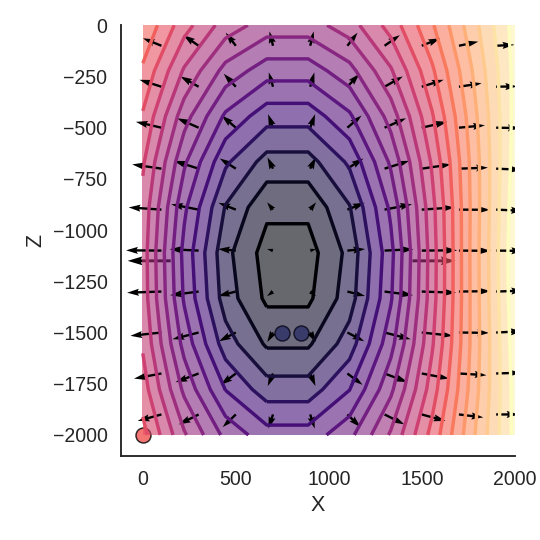

In [25]:
%matplotlib notebook

import matplotlib.pyplot as plt
lith, _ = gp.compute_model(interp_data)

geo_data.calculate_gradient()

#vec_field2 = a[:1000].reshape(10,10,10)
V = np.zeros((10,10))
import matplotlib.pyplot as plt
#plt.quiver(vec_field2[:,5,:].T, V)
s= a[0][2].reshape(10,10,10)[:,5,:].T 
V = a[0][4].reshape(10,10,10)[:,5,:].T 
gp.plot_scalar_field(geo_data, lith[1], 5, direction='y')

plt.quiver(geo_data.grid.values[:,0].reshape(10,10,10)[:,5,:].T,
           geo_data.grid.values[:,2].reshape(10,10,10)[:,5,:].T, s, V, pivot="tail")
#plt.contour(lith[1][:1000].reshape(10,10,10)[:,5,:].T, 50, cmap='inferno',  )
#ax = plt.gca()
#ax.set_ylim(ax.get_ylim()[1], ax.get_ylim()[0])

Dual Kriging parameters __str__ = [  2.52147660e+00  -2.52147660e+00   2.74023008e-16  -2.74023008e-16  -5.04902173e-15   5.04902173e-15  -3.58206749e-13  -8.63764524e-16   0.00000000e+00  -6.12323400e-17]
Potential field at all points __str__ = [ 39.862854    39.84688187  39.83488846 ...,  39.99224472  39.53987503  39.53987503]


../../gempy/gempy_front.py:881: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


<IPython.core.display.Javascript object>


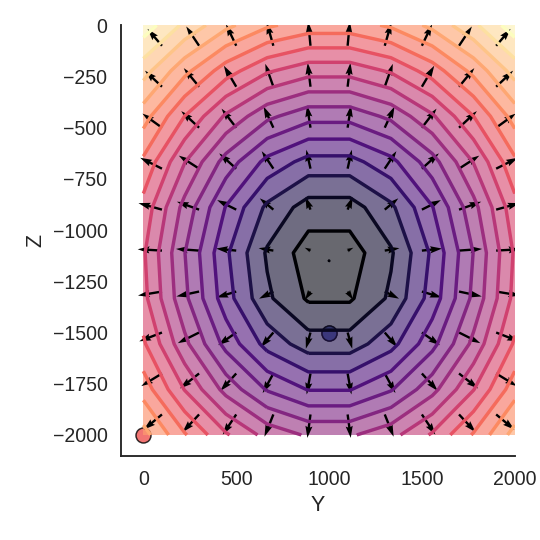

In [26]:
%matplotlib notebook

import matplotlib.pyplot as plt
lith, _ = gp.compute_model(interp_data)

geo_data.calculate_gradient()

#vec_field2 = a[:1000].reshape(10,10,10)
V = np.zeros((10,10))
import matplotlib.pyplot as plt
#plt.quiver(vec_field2[:,5,:].T, V)
s= a[0][3].reshape(10,10,10)[5,:,:].T 
V = a[0][4].reshape(10,10,10)[5,:,:].T 
gp.plot_scalar_field(geo_data, lith[1], 5, direction='x')

plt.quiver(geo_data.grid.values[:,1].reshape(10,10,10)[5,:,:].T, geo_data.grid.values[:,2].reshape(10,10,10)[5,:,:].T, s, V, pivot="tail")

Dual Kriging parameters __str__ = [  2.52147660e+00  -2.52147660e+00   2.74023008e-16  -2.74023008e-16  -5.04902173e-15   5.04902173e-15  -3.58206749e-13  -8.63764524e-16   0.00000000e+00  -6.12323400e-17]
Potential field at all points __str__ = [ 39.862854    39.84688187  39.83488846 ...,  39.99224472  39.53987503  39.53987503]


../../gempy/gempy_front.py:881: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


<IPython.core.display.Javascript object>


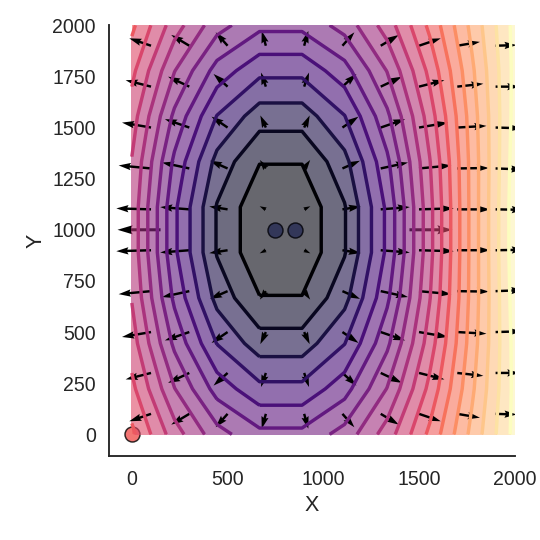

In [24]:
%matplotlib notebook

import matplotlib.pyplot as plt
lith, _ = gp.compute_model(interp_data)

geo_data.calculate_gradient()

#vec_field2 = a[:1000].reshape(10,10,10)
V = np.zeros((10,10))
import matplotlib.pyplot as plt
#plt.quiver(vec_field2[:,5,:].T, V)
s= a[0][2].reshape(10,10,10)[:,:,5].T 
V = a[0][3].reshape(10,10,10)[:,:,5].T 
gp.plot_scalar_field(geo_data, lith[1], 5, direction='z')

plt.quiver(geo_data.grid.values[:,0].reshape(10,10,10)[:,:,5].T, geo_data.grid.values[:,1].reshape(10,10,10)[:,:,5].T, s, V, pivot="tail")

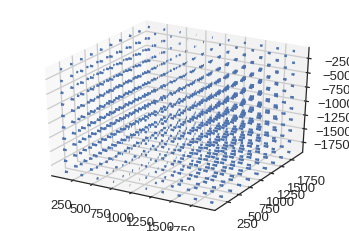

In [40]:
%matplotlib inline
'''
==============
3D quiver plot
==============

Demonstrates plotting directional arrows at points on a 3d meshgrid.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')


ax.quiver(geo_data.grid.values[:,0],
              geo_data.grid.values[:,1],
              geo_data.grid.values[:,2],
              b[0][:1000],
              np.zeros_like(b[0][:1000]),
              np.zeros_like(b[0][:1000]), length=80, normalize=False,)

plt.show()

In [16]:
import ipyvolume as p4
p4.quiver(geo_data.grid.values[:,0],
              geo_data.grid.values[:,1],
              geo_data.grid.values[:,2],
              b[0][:1000],
              np.zeros_like(b[0][:1000]),
              np.zeros_like(b[0][:1000]), size=10)
p4.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color_selected=array('white', 
      dtype='<U5'), geo='arrow', size=array(10), size_selected=array(26.0), vx=array([-0.43522623, -0.48545839, -0.52539344, -0.54987282, -0.5549956 , -0.53986116, -0.50704294, -0.46130596, -0.40780656, -0.35095795, -0.49823807, -0.56019977, -0.61121416, -0.64351919,
       -0.65040177, -0.63019597, -0.58754352, -0.53014561, -0.46520915, -0.39810696, -0.55499561, -0.63019599, -0.69535965, -0.73909891, -0.74877549, -0.72075586, -0.66464944, -0.59329991,
       -0.5160902 , -0.43882526, -0.59916095, -0.68737549, -0.76932821, -0.83081878, -0.84583708, -0.80401515, -0.72976951, -0.64351916, -0.55499558, -0.46915971, -0.62374121, -0.72075587,
       -0.81695509, -0.90281864, -0.93056544, -0.86236215, -0.76932818, -0.67203324, -0.57632885, -0.48545836, -0.62374121, -0.72075587, -0.81695508, -0.90281863, -0.93056542, -0.86236214,
       -0.76932817, -0.67203324, -0.57632884, -0.48545836, -0.59916094, -0.68737547, -0.76932819, -0.83081875, -0.84583705, -0.80401513, -0.72976949, -0.64351915, -0.55499557, -0.46915971,
       -0.55499559, -0.63019597, -0.69535962, -0.73909888, -0.74877546, -0.72075583, -0.66464942, -0.5932999 , -0.51609019, -0.43882525, -0.49823805, -0.56019975, -0.61121413, -0.64351916,
       -0.65040174, -0.63019595, -0.58754349, -0.5301456 , -0.46520913, -0.39810695, -0.43522621, -0.48545837, -0.52539342, -0.5498728 , -0.55499557, -0.53986114, -0.50704292, -0.46130594,
       -0.40780654, -0.35095794, -0.35901181, -0.40182081, -0.43618935, -0.45739321, -0.4618427 , -0.4487093 , -0.42036111, -0.38117763, -0.33584771, -0.28827437, -0.41278777, -0.46636698,
       -0.51090739, -0.53924117, -0.54528372, -0.52754837, -0.49020136, -0.44029787, -0.38450623, -0.32768787, -0.4618427 , -0.52754838, -0.58472589, -0.62282719, -0.63117788, -0.60690605,
       -0.55779318, -0.49523122, -0.42815743, -0.36206297, -0.50035638, -0.57773151, -0.64876452, -0.69924745, -0.71075326, -0.67776432, -0.61474274, -0.53924115, -0.46184268, -0.38787817,
       -0.52188674, -0.60690606, -0.6882643 , -0.7481565 , -0.75991335, -0.72280474, -0.64876449, -0.56427452, -0.48041383, -0.40182078, -0.52188674, -0.60690605, -0.68826429, -0.7481565 ,
       -0.75991335, -0.72280473, -0.64876448, -0.56427451, -0.48041383, -0.40182078, -0.50035637, -0.5777315 , -0.6487645 , -0.69924743, -0.71075324, -0.6777643 , -0.61474273, -0.53924114,
       -0.46184267, -0.38787817, -0.46184269, -0.52754837, -0.58472587, -0.62282717, -0.63117786, -0.60690603, -0.55779316, -0.49523121, -0.42815742, -0.36206296, -0.41278775, -0.46636696,
       -0.51090737, -0.53924114, -0.5452837 , -0.52754835, -0.49020134, -0.44029785, -0.38450621, -0.32768786, -0.35901179, -0.40182079, -0.43618933, -0.45739318, -0.46184267, -0.44870928,
       -0.42036109, -0.38117761, -0.3358477 , -0.28827435, -0.23646189, -0.26507765, -0.28805509, -0.30219898, -0.30516125, -0.29641129, -0.27747726, -0.25127215, -0.22101151, -0.18940304,
       -0.2724129 , -0.30817072, -0.33759465, -0.35601193, -0.35989581, -0.34844923, -0.32397028, -0.29079855, -0.25349768, -0.21557729, -0.30516125, -0.34844924, -0.38472168, -0.40747457,
       -0.41223853, -0.39815155, -0.36787608, -0.32729002, -0.28268889, -0.23849928, -0.33066634, -0.38039717, -0.42194035, -0.44646991, -0.45115083, -0.43673714, -0.40277752, -0.35601191,
       -0.30516124, -0.25575247, -0.34476735, -0.39815155, -0.44164338, -0.46310765, -0.46562751, -0.4555907 , -0.42194033, -0.37197519, -0.31749474, -0.26507764, -0.34476734, -0.39815155,
       -0.44164338, -0.46310765, -0.46562751, -0.45559069, -0.42194033, -0.37197519, -0.31749474, -0.26507763, -0.33066634, -0.38039717, -0.42194034, -0.4464699 , -0.45115082, -0.43673713,
       -0.40277751, -